<body>
<div align='center'>
<h2>KNN</h2>
<h3>K-Nearest Neighbors</h3>
</div>
<li>KNN is widely used for classification.
<li>The principle behind the method is to find a pre-defined number of training simples, closest in distance to the point, and predict the label from these.
<li>Knn stores entire dataset as a training algorithm and categorizes the test datapoint using stored information of its nearest neighbors, k is the number of neighbors
<hr color="cian">
</body>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Material/S_12_KNN/Coded_Data.csv',
                 index_col=0)
df.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


In [97]:
df.isnull().value_counts()

Cd_1   Cd_2   Cd_3   Cd_4   Cd_5   Cd_6   Cd_7   Cd_8   Cd_9   Cd_10  Result
False  False  False  False  False  False  False  False  False  False  False     1000
dtype: int64

In [98]:
df.isna().value_counts()

Cd_1   Cd_2   Cd_3   Cd_4   Cd_5   Cd_6   Cd_7   Cd_8   Cd_9   Cd_10  Result
False  False  False  False  False  False  False  False  False  False  False     1000
dtype: int64

<h4>Data Explore</h4>

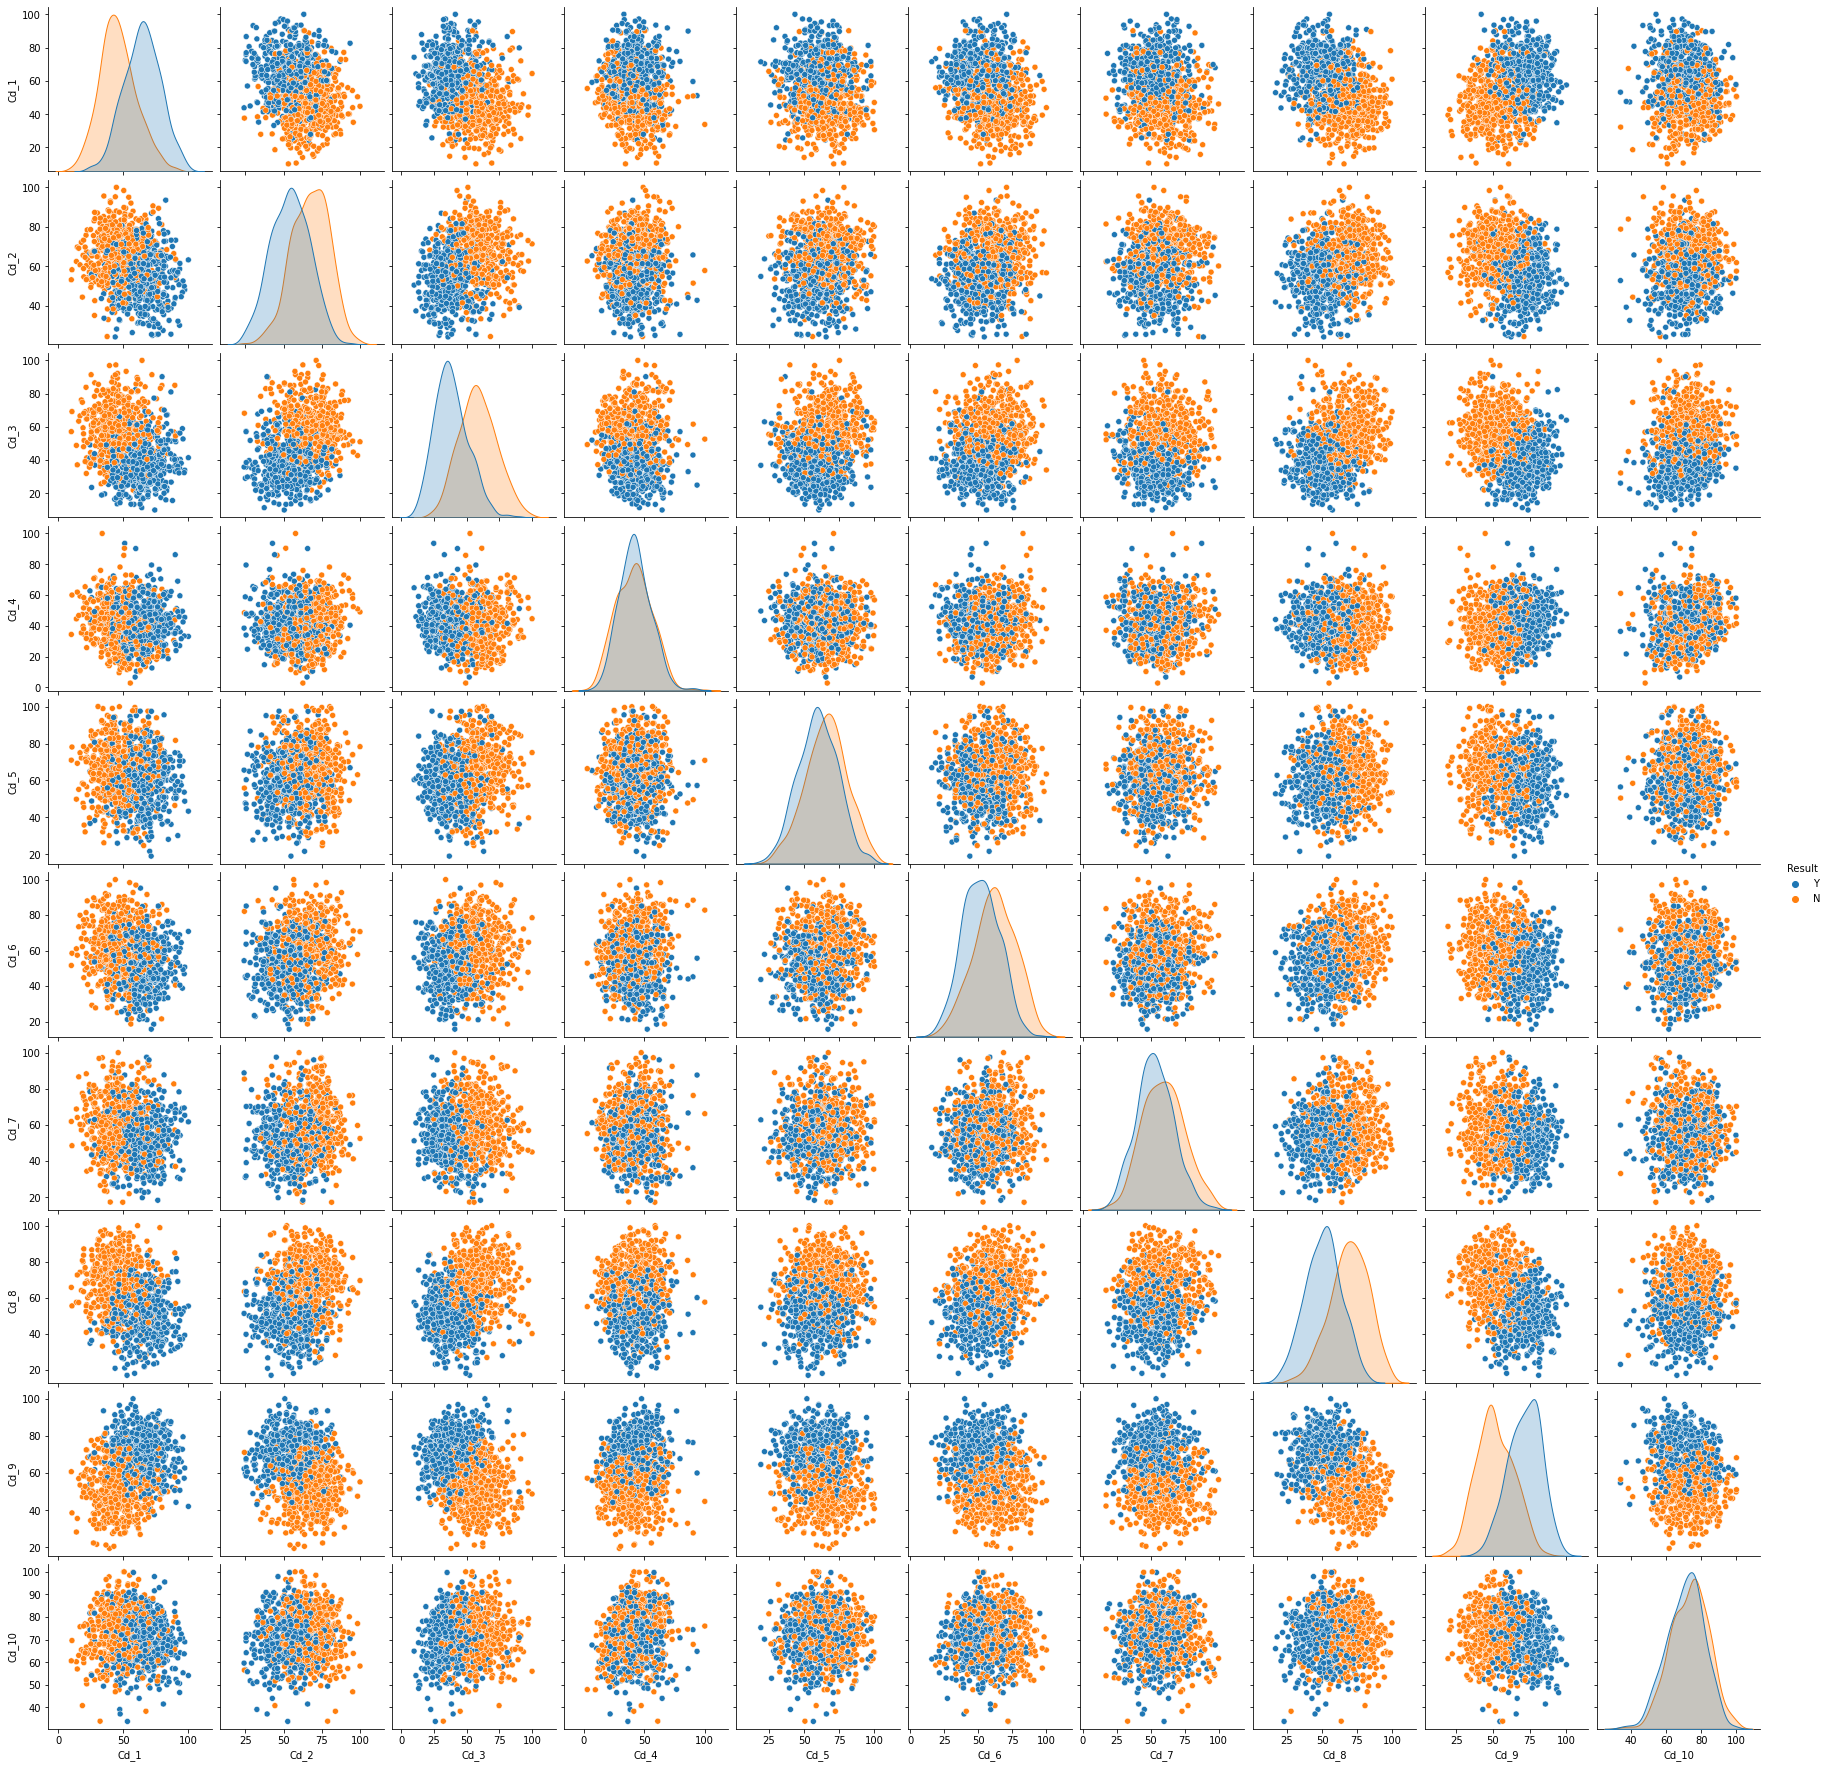

In [6]:
sns.pairplot(df, hue='Result')

Text(0.5, 1.0, '\nColumns Correlation\n')

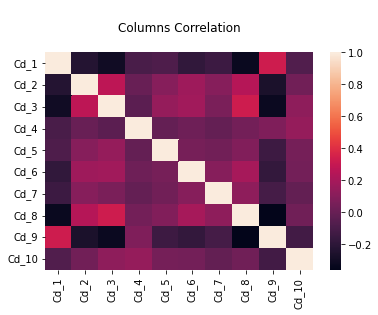

In [99]:
sns.heatmap(df.corr())
plt.title('\nColumns Correlation\n')

<h4>KNN Model</h4>

<body>Predictions are made by identifying the data points that are near to the test data point, which is majority voting based on the K value.
</br>I such situation the sclae of the features does matter, variables with large scale will have larger effect on the distance between the observation and also on the K value and unclassified as compared to the variables on smaller scales.
</br>To deal with this issue, we need to do standardization after variables on the same scale.
</br></br></body>

<img src="https://d3i71xaburhd42.cloudfront.net/1d1cc23015232de1c60dc4de8c05b0b4229d4a1c/25-Figure2.1-1.png"/>

In [9]:
from sklearn.preprocessing import StandardScaler

In [20]:
#fit the Standard Scaler
scaler = StandardScaler()

In [13]:
target = df['Result']
feature = df.drop('Result', axis=1)

print('target shape:\n', target.shape)
print('\nfeature shape:\n', feature.shape)


target shape:
 (1000,)

feature shape:
 (1000, 10)


In [22]:
scaler.fit(feature)
scaled_features = scaler.transform(feature)
type(scaled_features)

numpy.ndarray

In [24]:
cols = df.columns[:-1] #drop Result
cols

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [26]:
#new df with the scaler and the columns
df_scaled = pd.DataFrame(data=scaled_features, columns=cols)
df_scaled.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232


In [27]:
X = scaled_features
Y = target

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

<body><h4>First try with neighbors =1</h4>The focus is to come up to the model that can predict the class in the result for the new data point
</br>To move on with the K points we need to import the KN Classifier</body>

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#fit using k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
#predictions
pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png"/>

In [49]:
print('___Confusion Matrix___\n',confusion_matrix(y_test, pred))
print('\n___Classification Report:___\n\n', classification_report(y_test, pred))

___Confusion Matrix___
 [[134   8]
 [ 12 146]]

___Classification Report:___

               precision    recall  f1-score   support

           N       0.92      0.94      0.93       142
           Y       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



<body><h4>The better K value</h4>Improve the model using some better value fo K applyinf the E method to find out the good K value.
</br>We can create a range of K and models usign different K values (like 1 to 30) and than get the error rate every K value and plot against K to find out the optimum value.</body>

In [50]:
err_rate = []
for i in range(1,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  err_rate.append(np.mean(pred_i != y_test))

In [53]:
err_rate

[0.06666666666666667,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.06333333333333334,
 0.06,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05]

Text(13, 0.058, 'The better K values')

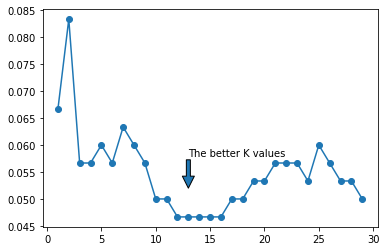

In [96]:
plt.plot(range(1,30), err_rate, marker ='o')
plt.annotate('The better K values', xy=(13,0.052),
             arrowprops=dict(ArrowStyle='->'), xytext=(13, 0.058))

In [91]:
#testing the values with error_rate closer to zero 12-16 
#and see the accuracy and the wrong values

knn = KNeighborsClassifier(n_neighbors=16) 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('___Confusion Matrix___\n',confusion_matrix(y_test, pred))
print('\n___Classification Report:___\n\n', classification_report(y_test, pred))

___Confusion Matrix___
 [[136   6]
 [  8 150]]

___Classification Report:___

               precision    recall  f1-score   support

           N       0.94      0.96      0.95       142
           Y       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

